# import lib

In [1]:
import pandas
import psycopg2
import configparser

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to db

In [56]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

#q1

In [4]:
q1_sql = """
        select * from gp15.student
"""

In [5]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,major
0,kerrcw@jmu.edu,Cameron Kerr,IA
1,doejohn@jmu.edu,John Doe,Marketing
2,doejane@jmu.edu,Jane Doe,Accounting
3,smithr@jmu.edu,Rob Smith,Finance


#q2

In [6]:
q2_sql = """
                    select gp15.professor.p_name, gp15.course.c_name
                    from gp15.professor
                    inner join gp15.course
                    on gp15.professor.p_email=gp15.course.p_email
                    """

In [7]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,Data Mining
1,Noel Hendrickson,Counterfactual Reasoning
2,Ronald Raab,WMDs
3,Xuebin Wei,Data Visualization
4,Bob Jones,Intro to IA
5,Bob Jones,Seminar on Issues in IA
6,Prof 7,counterprolif


#q3

In [18]:
q3_sql = """
            select c_number, count(*) as num_enrolled
            from gp15.enroll
            group by c_number
            order by num_enrolled desc
"""

In [19]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enrolled
0,IA313,4
1,IA340,2
2,IA460,2
3,IA300,2


<AxesSubplot:>

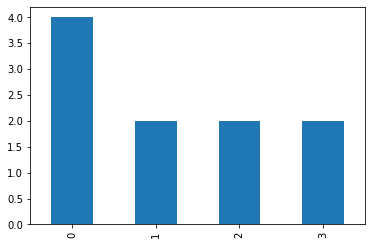

In [20]:
df.num_enrolled.plot.bar(x='c_number', y='num_enrolled')

In [21]:
conn.rollback()

In [57]:
q3_sql = """
            select c_number, count(*) as num_enrolled
            from gp15.enroll
            group by c_number
            order by num_enrolled desc
"""

In [58]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enrolled
0,IA313,4
1,IA340,2
2,IA460,2
3,IA300,2


<AxesSubplot:>

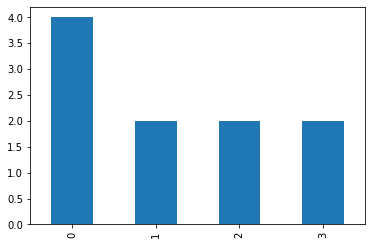

In [59]:
df.num_enrolled.plot.bar(x='c_number', y='num_enrolled')

#q4

In [60]:
q4_sql = """
            select gp15.professor.p_name, count(*) as num_teaching
            from gp15.professor
            inner join gp15.course
            on gp15.professor.p_email=gp15.course.p_email
            
            group by gp15.professor.p_name
            order by num_teaching desc
"""

In [61]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_teaching
0,Xuebin Wei,2
1,Bob Jones,2
2,Prof 7,2
3,Noel Hendrickson,1
4,Ronald Raab,1


<AxesSubplot:xlabel='p_name'>

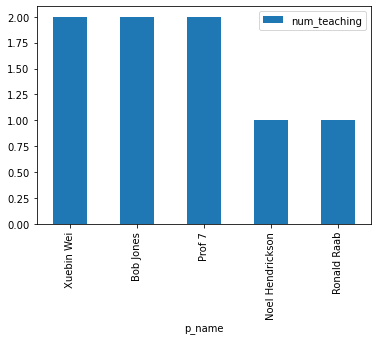

In [62]:
df.plot.bar(x='p_name', y='num_teaching')

#q5

In [33]:
conn.rollback()

In [34]:
q5_sql = """
            insert into gp15.professor (p_email, p_name, p_office)
            values ('{}','{}','{}')
            
""".format('prof8@jmu.edu', 'Prof 8', 'ISAT1234')

In [35]:
cur.execute(q5_sql)

In [36]:
conn.commit()

In [37]:
df=pandas.read_sql_query('select * from gp15.professor',conn)
df[:]

,p_email,p_name,p_office
0,weixx@jmu.edu,Xuebin Wei,HHS112
1,raabrw@jmu.edu,Ronald Raab,ISAT156
2,hendrix@jmu.edu,Noel Hendrickson,ISAT117
3,prof123@jmu.edu,Bob Jones,ISAT 111
4,prof7@jmu.edu,Prof 7,ISAT123
5,prof8@jmu.edu,Prof 8,ISAT1234


In [40]:
conn.rollback()

In [41]:
q5pt2_sql = """
        insert into gp15.course(c_number, c_name, c_room, p_email)
        values ('{}','{}','{}','{}')
""".format('IA333', 'counterprolif', 'ISAT555', 'prof7@jmu.edu')

In [42]:
cur.execute(q5pt2_sql)

In [43]:
conn.commit()

In [44]:
df=pandas.read_sql_query('select * from gp15.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA340,Data Mining,ENGEO2010,weixx@jmu.edu
1,IA313,Counterfactual Reasoning,ENGEO1204,hendrix@jmu.edu
2,IA460,WMDs,ISAT141,raabrw@jmu.edu
3,IA341,Data Visualization,ISAT123,weixx@jmu.edu
4,IA 150,Intro to IA,ISAT 111,prof123@jmu.edu
5,IA300,Seminar on Issues in IA,ISAT150,prof123@jmu.edu
6,IA444,counterprolif,ISAT555,prof7@jmu.edu
7,IA333,counterprolif,ISAT555,prof7@jmu.edu


In [45]:
q6_sql = """
            update gp15.course
            set p_email='prof123@jmu.edu'
            where p_email='marrinsp@jmu.edu'
"""

In [46]:
cur.execute(q6_sql)

In [47]:
conn.commit()

In [53]:
df=pandas.read_sql_query('select * from gp15.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA340,Data Mining,ENGEO2010,weixx@jmu.edu
1,IA313,Counterfactual Reasoning,ENGEO1204,hendrix@jmu.edu
2,IA460,WMDs,ISAT141,raabrw@jmu.edu
3,IA341,Data Visualization,ISAT123,weixx@jmu.edu
4,IA 150,Intro to IA,ISAT 111,prof123@jmu.edu
5,IA300,Seminar on Issues in IA,ISAT150,prof123@jmu.edu
6,IA444,counterprolif,ISAT555,prof7@jmu.edu
7,IA333,counterprolif,ISAT555,prof7@jmu.edu


In [50]:
q6pt2_sql = """
            delete from gp15.professor
            where p_email = 'marrinsp@jmu.edu'
"""

In [51]:
cur.execute(q6pt2_sql)

In [52]:
conn.commit()

In [54]:
df=pandas.read_sql_query('select * from gp15.professor',conn)
df[:]

,p_email,p_name,p_office
0,weixx@jmu.edu,Xuebin Wei,HHS112
1,raabrw@jmu.edu,Ronald Raab,ISAT156
2,hendrix@jmu.edu,Noel Hendrickson,ISAT117
3,prof123@jmu.edu,Bob Jones,ISAT 111
4,prof7@jmu.edu,Prof 7,ISAT123
5,prof8@jmu.edu,Prof 8,ISAT1234


#close the cursor and connection

In [63]:
cur.close()
conn.close()